In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import datetime
import seaborn as sns
import pandas as pd
import cProfile
from matplotlib.mlab import PCA
from functions import *
from costs import *
from proj1_helpers import *
from method_comparison_helpers import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
# Load Data
with zipfile.ZipFile("../data/test.csv.zip","r") as zip_ref:
    zip_ref.extractall("../data/")
DATA_TRAIN_PATH = '../data/train.csv' 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)
DATA_TEST_PATH = '../data/test.csv'
y_test, tx_test, ids_test = load_csv_data(DATA_TEST_PATH)
all_y = np.append(y, y_test)
all_tx = np.concatenate((tx, tx_test))

## Exploratory data analysis

In [3]:
# Lets load it into Pandas data frame since it is easier for data analysis
original_df = pd.DataFrame(tx)
columns = original_df.columns.to_series()
sparse_columns = np.array([])
for i, column in columns.iteritems():
    value_counts = original_df[original_df.columns[column]].value_counts()
    if -999 in value_counts:
        sparse_columns = np.append(sparse_columns, [column])
# Lets replace -999 values for nan's
replaced999_df = original_df.replace(-999, np.nan)

In [4]:
copy_df = replaced999_df.copy()
copy_df.fillna(-99, inplace=True)

In [129]:
def power_of_2(x):
    # that, if x is a string,
    if type(x) is str:
        # just returns it untouched
        return x
    # but, if not, return it multiplied by 100
    elif x:
        return x * x
    # and leave everything else
    else:
        x
        
import itertools

def permutation(df, list_a, list_b):
    perms = list(itertools.product(list_a, list_b))
    for element in perms:
        perm_name = element[0] + '_x_' + element[1]
        df[perm_name] = df[element[0]] * df[element[1]]
        


In [131]:
# d = {'1' : pd.Series([1., 2., 3.]),'two' : pd.Series([2., 2., 2.,])}
# ttest_df = pd.DataFrame(d)
# permutation(ttest_df, ['1'], ['two'])
# ttest_df

,1,two,1_x_two
0,1.0,2.0,2.0
1,2.0,2.0,4.0
2,3.0,2.0,6.0


In [152]:
columns_list = list(replaced999_df.columns.values)
columns_list = [str(x) for x in columns_list]

In [153]:
# EXploratory DATASET 5
squared_df = replaced999_df.copy()
squared_df = squared_df.applymap(power_of_2)
squared_df = replaced999_df.join(squared_df, how='outer', rsuffix='_squared')
squared_df_normalized = (squared_df - squared_df.mean()) / squared_df.std()
squared_df.fillna(-5, inplace=True) # best for -5
squared_df_normalized.fillna(-5, inplace=True) # best for -5
permutation(squared_df, columns_list, columns_list)
permutation(squared_df_normalized, columns_list, columns_list)

squared_df.shape

(250000, 960)

In [7]:
# EXPLORATORY DATASET 1
# mean_filled_df - Dataset for which NaN's values were replaced by mean of column
mean_filled_df = replaced999_df.copy()
for i, column in np.ndenumerate(sparse_columns):
    col_mean = mean_filled_df[column].mean()
    mean_filled_df[column] = mean_filled_df[column].fillna(col_mean)
# mean_filled_normalized_df - mean_filled_df where mean value of colum was also subtracted for each element in same column
mean_filled_normalized_df = mean_filled_df#(mean_filled_df - mean_filled_df.mean()) / (mean_filled_df.max() - mean_filled_df.min())

In [8]:
# EXPLORATORY DATASET 2
# zero_filled_df - Dataset for which NaN's values were replaced by 0
zero_filled_df = replaced999_df.fillna(0)
# zero_filled_normalized_df - zero_filled_df where mean value of colum was also subtracted for each element in same column
zero_filled_normalized_df = zero_filled_df#(zero_filled_df - zero_filled_df.mean()) / (zero_filled_df.max() - zero_filled_df.min())

In [9]:
# EXPLORATORY DATASET 3
# Lets sum all sprase columns and combine it into new one
combined_df = replaced999_df.copy()
combined_df['combined'] = replaced999_df[sparse_columns].sum(axis=1)
# and drop those nan columns leaving combined
droped_nans_df = combined_df.dropna(axis=1, thresh=250000)
# normalized_df - droped_nans_df where mean value of colum was also subtracted for each element in same column
normalized_df = droped_nans_df#(droped_nans_df - droped_nans_df.mean()) / (droped_nans_df.max() - droped_nans_df.min())

In [154]:
# Lets do exactly the same but for test dataset
original_test_df = pd.DataFrame(tx_test)
replaced999_test_df = original_test_df.replace(-999, np.nan)
squared_test_df = replaced999_test_df.copy()
copy_test_df = replaced999_test_df.copy()
copy_test_df.fillna(-99, inplace=True)
mean_filled_test_df = replaced999_test_df.copy()
for i, column in np.ndenumerate(sparse_columns):
    col_mean = mean_filled_test_df[column].mean()
    mean_filled_test_df[column] = mean_filled_test_df[column].fillna(col_mean)
mean_filled_normalized_test_df = mean_filled_test_df#(mean_filled_test_df - mean_filled_test_df.mean()) / (mean_filled_test_df.max() - mean_filled_test_df.min())
combined_test_df = replaced999_test_df.copy()
combined_test_df['combined'] = combined_test_df[sparse_columns].sum(axis=1)
droped_nans_test_df = combined_test_df.dropna(axis=1, thresh=568000)
normalized_test_df = droped_nans_test_df#(droped_nans_test_df - droped_nans_test_df.mean()) / (droped_nans_test_df.max() - droped_nans_test_df.min())


squared_test_df = squared_test_df.applymap(power_of_2)
squared_test_df = replaced999_test_df.join(squared_test_df, how='outer', rsuffix='_squared')
squared_test_df_normalized = (squared_test_df - squared_test_df.mean()) / squared_test_df.std()
squared_test_df.fillna(-5, inplace=True)
squared_test_df_normalized.fillna(-5, inplace=True)
permutation(squared_test_df, columns_list, columns_list)
permutation(squared_test_df_normalized, columns_list, columns_list)

squared_test_df.shape

zero_filled_test_df = replaced999_test_df.fillna(0)
zero_filled_test_normalized_df = zero_filled_test_df#(zero_filled_test_df - zero_filled_test_df.mean()) / (zero_filled_test_df.max() - zero_filled_test_df.min())

In [11]:
# 4th Dataset
ninefilled_normalized_df = copy_df#(copy_df - copy_df.mean()) / (copy_df.max() - copy_df.min())
ninefilled_tx = ninefilled_normalized_df.as_matrix()
ninefilled_test_normalized_df = copy_test_df#(copy_test_df - copy_test_df.mean()) / (copy_test_df.max() - copy_test_df.min())
ninefilled_test_tx = ninefilled_test_normalized_df.as_matrix()

In [155]:
# Lets change it back to numpy array

# train datasets
new_meanfilled_tx = mean_filled_normalized_df.as_matrix() # DATASET 1
new_zerofilled_tx = zero_filled_normalized_df.as_matrix()[:,0:30] # DATASET 2
new_tx = normalized_df.as_matrix() # DATASET 3
squared_tx = squared_df.as_matrix()
squared_tx_normalized = squared_df_normalized.as_matrix()
squared_datasets = [squared_tx, squared_tx_normalized]
train_datasets = [tx, new_meanfilled_tx, new_zerofilled_tx, new_tx, ninefilled_tx]
new_train_datasets = [new_meanfilled_tx, new_zerofilled_tx, new_tx, ninefilled_tx]

# test datasets
new_meanfilled_tx_test = mean_filled_normalized_test_df.as_matrix() # DATASET 1
new_zerofilled_tx_test = zero_filled_test_normalized_df.as_matrix()[:,0:30] # DATASET 2
new_tx_test = normalized_test_df.as_matrix() # DATASET 3
squared_tx_test = squared_test_df.as_matrix()
squared_tx_test_normalized = squared_test_df_normalized.as_matrix()
squared_test_datasets = [squared_tx_test, squared_tx_test_normalized]
test_datasets = [new_meanfilled_tx_test, new_zerofilled_tx_test, new_tx_test, ninefilled_test_tx]
new_test_datasets = [new_meanfilled_tx_test, new_zerofilled_tx_test, new_tx_test, ninefilled_test_tx]

# train and test combined
new_all_meanfilled_tx = np.concatenate((new_meanfilled_tx, new_meanfilled_tx_test)) # DATASET 1
new_all_zerofilled_tx = np.concatenate((new_zerofilled_tx, new_zerofilled_tx_test)) # DATASET 2
new_all_tx = np.concatenate((new_tx, new_tx_test)) # DATASET 3
all_detasets = [all_tx, new_all_meanfilled_tx, new_all_zerofilled_tx, new_all_tx]

squared_datasets_names = ['Squared', 'Squared Normalized']
datasets_names = ['Original/Raw', 'Mean filled', 'Zero filled', 'NaN dropped', '-99 filled']
new_datasets_names = ['Mean filled', 'Zero filled', 'NaN dropped', '-99 filled']

## Logistic Regression

In [97]:
#Parameters 
max_iters = 1000
gammas = np.logspace(-12, -11, 10)

Logistic Regression for 9 filled: execution time=193.907 seconds.


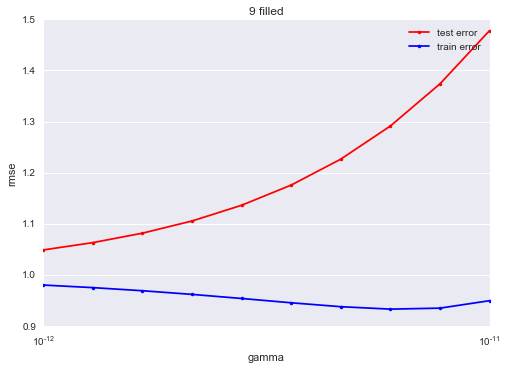

In [98]:
train, test, weight = logistic_regression_dataset_gammas_test(y, y_test, squared_tx_normalized, squared_tx_test_normalized, max_iters, gammas, '9 filled', 1)

In [93]:
gamma = 0.6e-10
max_iters = 1000
logistic_regression_dataset_single_gamma_test(y, y_test, squared_tx_normalized, squared_tx_test_normalized, max_iters, gamma, 'Squared Normalized')

Logistic Regression for Squared Normalized: execution time=19.143 seconds.


(2.2344011779998008,
 3.270603885999888,
 array([  1.23560365e-02,  -4.54952123e-03,  -1.44492317e-04,
          1.51018345e-03,   3.34861484e-02,   3.34190869e-02,
          3.10051610e-02,   8.45003153e-04,  -7.90366496e-04,
          6.63240370e-04,  -2.85516835e-03,   2.95828148e-03,
          3.34128754e-02,   2.88903404e-03,  -3.15928744e-05,
         -6.37620367e-05,  -8.37705299e-04,  -8.58660235e-06,
          6.67754699e-05,  -3.66667920e-04,   1.01641245e-04,
          5.34395560e-04,   1.67925955e-05,   2.05956868e-02,
          2.01089870e-02,   2.00974005e-02,   3.20222328e-02,
          3.21715785e-02,   3.21372687e-02,   3.10926065e-04,
          1.14227541e-02,  -2.75205793e-03,  -8.98447777e-04,
          9.24900343e-04,   3.35829627e-02,   3.31653310e-02,
          3.31558256e-02,   4.16046485e-04,  -3.58876886e-05,
          1.41919908e-04,  -1.58261601e-03,   1.12167486e-03,
          3.70947144e-02,   1.47050895e-03,  -1.53364395e-03,
         -9.29307351e-06,  -5

Logistic Regression for Original/Raw: execution time=238.158 seconds.
Logistic Regression for Squared: execution time=35.468 seconds.
Logistic Regression for Squared Normalized: execution time=36.407 seconds.


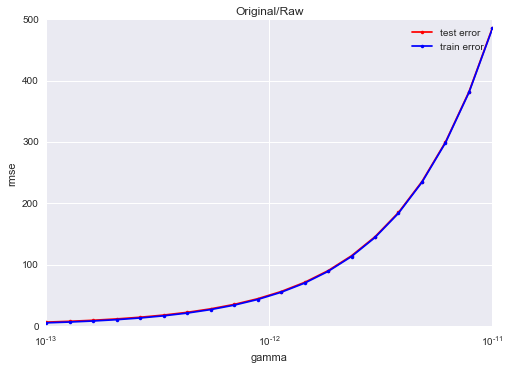

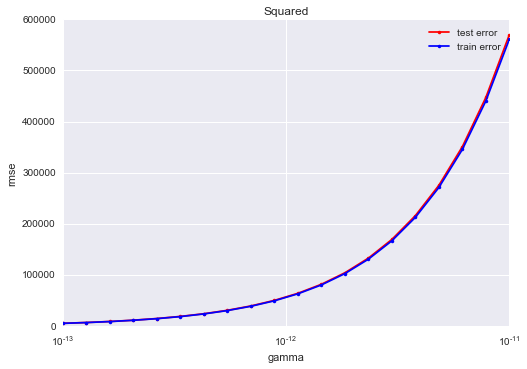

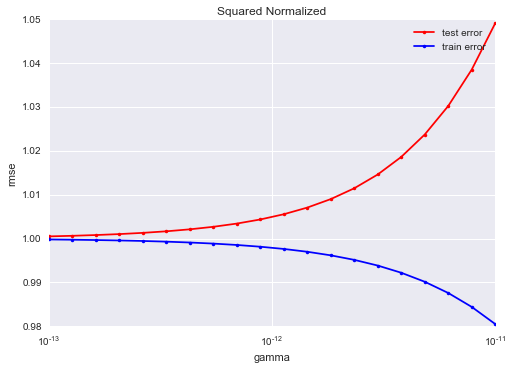

In [86]:
# Logistic Regression of all datasets vs gammas. 
# WARNING Takes a lot of time (~30 min)

for i in range(len(squared_datasets)):
    # Parameters
    train_dataset = squared_datasets[i]
    test_dataset = squared_test_datasets[i]
    dataset_name = squared_datasets_names[i]
    figure_id = i
    
    logistic_regression_dataset_gammas_test(y, y_test, train_dataset, test_dataset, max_iters, gammas, dataset_name, figure_id)

In [ ]:
# Parameters
max_iters = 5000
gamma = 1e-16

In [ ]:
train_rmse, test_loss, weight = logistic_regression_dataset_single_gamma_test(y, y_test, train_datasets[1], test_datasets[1], max_iters, gamma, 'Mean filled')

In [69]:
train_losses = []
test_losses = []
weights = []
for i in range(len(train_datasets)):
    train_dataset = train_datasets[i]
    test_dataset = test_datasets[i]
    dataset_name = datasets_names[i]
    
    train_rmse, test_loss, weight = logistic_regression_dataset_single_gamma_test(y, y_test, train_dataset, test_dataset, max_iters, gamma, dataset_name)
    weights.append(weight)
    train_losses = np.append(train_losses, train_rmse)
    test_losses = np.append(test_losses, test_rmse)

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(train_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(train_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

NameError: name 'max_iters' is not defined

## Least Squares

### Gradient Descent

In [118]:
max_iters= 1000
gamma = 1.2e-3
grad_loss, gradient_w = least_squares_GD(y, squared_tx_normalized, gamma, max_iters)
train_rmse = compute_rmse_loss(grad_loss)
test_mse = compute_loss(y_test, squared_tx_test_normalized, gradient_w)
test_rmse = np.sqrt(2*test_mse)
print(train_rmse)
print(test_rmse)

0.829453599789
1.36917869424


Gradient Descent for Squared: execution time=14.850 seconds. Train RMSE Loss=nan, Test RMSE Loss=nan


ValueError: Data has no positive values, and therefore can not be log-scaled.

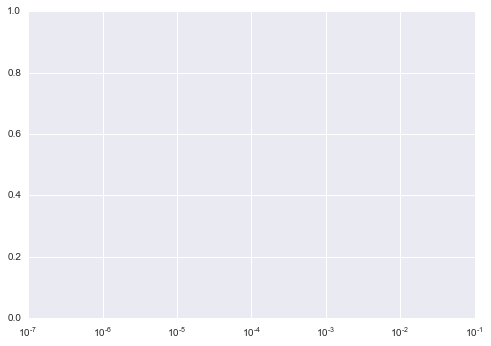

In [109]:
max_iters = 100
gammas = np.logspace(-5, -3, 10)
for i in range(len(squared_datasets)):
    # Parameters
    train_dataset = squared_datasets[i]
    test_dataset = squared_test_datasets[i]
    dataset_name = squared_datasets_names[i]
    figure_id = i
    
    least_squares_GD_gammas_test(y, y_test, train_dataset, test_dataset, gammas, max_iters, dataset_name, figure_id)

Lest Squares: execution time=40.687 seconds. RMSE Train Loss=9699.260906620864, Test Loss=10060.703740455157
Lest Squares: execution time=77.479 seconds. RMSE Train Loss=2529.61481614861, Test Loss=23499269431805.504


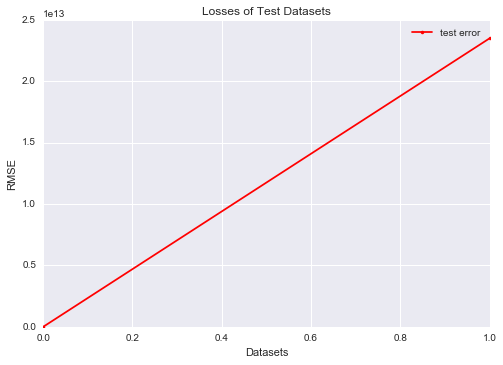

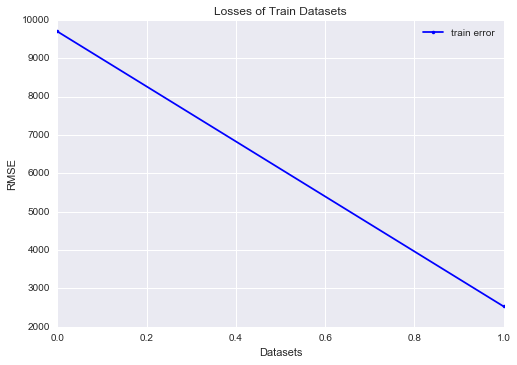

In [156]:
train_losses = []
test_losses = []
weights = []
for i in range(len(squared_datasets)):
    train_dataset = squared_datasets[i]
    test_dataset = squared_test_datasets[i]
    dataset_name = datasets_names[i]
    
    start_time = datetime.datetime.now()
    least_squares_loss, least_squares_w = least_squares(y, train_dataset)


    test_mse = compute_loss(y_test, test_dataset, least_squares_w)
    weights.append(least_squares_w)
    test_rmse = np.sqrt(2*test_mse)
    train_rmse = compute_rmse_loss(least_squares_loss)
    
    
    train_losses = np.append(train_losses, train_rmse)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Lest Squares: execution time={t:.3f} seconds. RMSE Train Loss={l}, Test Loss={tl}".format(t=exection_time, l=train_rmse, tl=test_rmse))

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(squared_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(squared_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

In [138]:
least_squares_loss, least_squares_w = least_squares(y, squared_tx_normalized)

test_mse = compute_loss(y_test, squared_tx_test_normalized, least_squares_w)
test_rmse = np.sqrt(2*test_mse)
train_rmse = compute_rmse_loss(least_squares_loss)
print(train_rmse, test_rmse)

0.789984059045 1.45800587272


In [ ]:
least_squares_loss, least_squares_w = least_squares(y, ninefilled_tx)

test_mse = compute_loss(y_test, ninefilled_test_tx, least_squares_w)
test_rmse = np.sqrt(2*test_mse)
train_rmse = compute_rmse_loss(least_squares_loss)
print(train_rmse, test_rmse)

In [ ]:
weights

In [139]:
OUTPUT_PATH = '../data/least_squares_with_squared_degree_and_permutations_normalized_submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(least_squares_w, squared_tx_test_normalized)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

## Ridge Regression

Ridge Regression for Squared: execution time=12.489 seconds.
Ridge Regression for Squared Normalized: execution time=11.995 seconds.


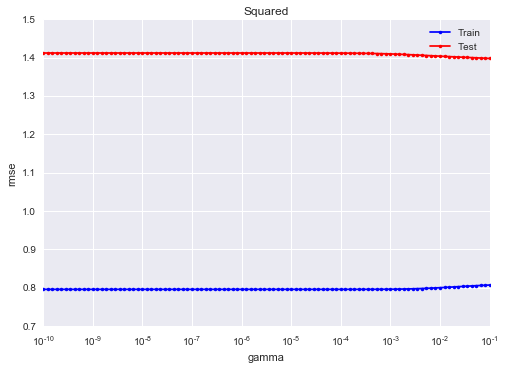

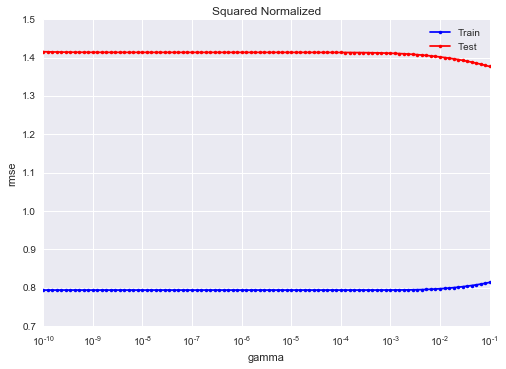

In [101]:
lambdas = np.logspace(-10, -1, 100)
for i in range(len(squared_datasets)):
    # Parameters
    train_dataset = squared_datasets[i]
    test_dataset = squared_test_datasets[i]
    dataset_name = squared_datasets_names[i]
    figure_id = i
    
    ridge_regression_dataset_lamdas_test(y, y_test, train_dataset, test_dataset, lambdas, dataset_name, figure_id)

In [102]:
# Parameters
lamb = 0.5e-2
ridge_regression_loss, ridge_regression_gradient_w = ridge_regression(y, squared_tx, lamb)
train_rmse = compute_rmse_loss(ridge_regression_loss)
test_mse = compute_loss(y_test, squared_tx_test, ridge_regression_gradient_w)
test_rmse = np.sqrt(2*test_mse)
print(train_rmse)
print(test_rmse)

0.798594472479
1.40586571081


In [ ]:
train_losses = []
test_losses = []
for i in range(len(train_datasets)):
    train_dataset = train_datasets[i]
    test_dataset = test_datasets[i]
    dataset_name = datasets_names[i]
    
    start_time = datetime.datetime.now()
    ridge_regression_loss, ridge_regression_gradient_w = ridge_regression(y, train_dataset, lamb)

    ridge_regression_loss = compute_rmse_loss(ridge_regression_loss)
    train_losses = np.append(train_losses, ridge_regression_loss)

    test_mse = compute_loss(y_test, test_dataset, ridge_regression_gradient_w)
    test_rmse = np.sqrt(2*test_mse)
    test_losses = np.append(test_losses, test_rmse)
    
    end_time = datetime.datetime.now()
    exection_time = (end_time - start_time).total_seconds()
    print("Ridge Regression for {dn}: execution time={t:.3f} seconds. Test RMSE Loss={l}, Train RMSE Loss={tl}".format(dn = dataset_name, t=exection_time, l=test_rmse, tl=ridge_regression_loss))

plt.figure(1)
plt.title("Losses of Test Datasets")
plt.plot(range(len(train_datasets)), test_losses, marker=".", color='r', label='test error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()
plt.figure(2)
plt.title("Losses of Train Datasets")
plt.plot(range(len(train_datasets)), train_losses, marker=".", color='b', label='train error')
plt.xlabel("Datasets")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

## Cross validation


In [ ]:
#TRY SOME CROSS VALIDATION HERE. Commented because I have only copied the code and did not calculate anything

# from plots import cross_validation_visualization

# subset_y = y
# subset_tx = new_all_zerofilled_tx


# # Define the parameters of the algorithm.
# seed = 1
# k_fold = 10
# lambdas = np.logspace(-16, 2, 1)

# rmse_tr = []
# rmse_te = []
# weights = np.empty((0,subset_tx.shape[1]), float)
# start_time = datetime.datetime.now()

# for lambd in np.nditer(lambdas):
#     w, loss_tr, loss_te = cross_validation(subset_y, subset_tx, k_fold, seed, lambd)
#     rmse_tr = np.append(rmse_tr, loss_tr)
#     rmse_te = np.append(rmse_te, loss_te)
#     weights = np.vstack((weights, w))
        
# end_time = datetime.datetime.now()
# exection_time = (end_time - start_time).total_seconds()

# print("Cross Validation: execution time={t:.3f} seconds.".format(t=exection_time))
# #cross_validation_visualization(lambdas, rmse_tr, rmse_te)